In [80]:
#Assignment on Artificial Neural Network Model Download the dataset of Crystal System
#Properties for Li-ion batteries Data Set: https://www.kaggle.com/datasets/divyansh22/crystal-
#system-properties-for-liion-batteries
#Consider the above dataset contains data about the
#physical and chemical properties of the Li-ion silicate cathodes. These properties can be
#useful to predict the class of a Li-ion battery. These batteries can be classified on the basis of
#their crystal system. Three major classes of crystal system include: monoclinic, orthorhombic
#and triclinic. Predict the battery classes with Artificial Neural Network (ANN) classification
#algorithm.

In [ ]:
import pandas as pd
"""
This script imports the pandas library, which is a powerful data manipulation and analysis tool for Python.

Filepath: /c:/Users/Asus/Downloads/TYIT_23_sj/TYIT_23_sj/practical_8/Assignment8.ipynb

Modules:
    pandas (pd): A library providing data structures and data analysis tools for Python.

Usage:
    This script is intended to be used as part of a Jupyter Notebook for data analysis tasks.
"""

In [82]:
df = pd.read_csv(r'C:\Users\Asus\Downloads\TYIT_23_sj\TYIT_23_sj\practical_8\lithium-ion batteries.csv')

In [ ]:
df.info()
"""
Displays a concise summary of a DataFrame.

This method prints information about a DataFrame including the index dtype and column dtypes, non-null values, and memory usage.

Returns:
    None
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                339 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    float64
 5   Band Gap (eV)          339 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         339 non-null    object 
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 26.9+ KB


In [ ]:
df.head()
"""
This code snippet displays the first few rows of the DataFrame `df` using the `head()` method.
The DataFrame `df` is expected to be defined earlier in the code.
The `head()` method, by default, returns the first 5 rows of the DataFrame.
"""

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [ ]:
df.describe()
"""
This code snippet performs a descriptive statistical analysis on a DataFrame `df`.
It uses the `describe()` method to generate summary statistics, which include
measures such as mean, standard deviation, min, max, and percentiles for each 
numerical column in the DataFrame.

Make sure that `df` is a pandas DataFrame before calling this method.
"""

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,-2.616950,0.058215,2.079740,38.837758,2.984003,467.765619
std,0.183809,0.030363,1.087968,23.133142,0.353968,292.674559
min,-2.985000,0.000000,0.000000,10.000000,2.200000,122.581000
25%,-2.757500,0.035500,1.265500,26.000000,2.760500,286.381500
50%,-2.605000,0.062000,2.499000,31.000000,2.947000,358.537000
75%,-2.525500,0.081500,2.968000,52.000000,3.106000,601.696500
max,-2.012000,0.190000,3.823000,132.000000,4.201000,1518.850000


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
"""
This script preprocesses a DataFrame by encoding categorical variables and converting boolean values to integers.

Steps:
1. Import necessary libraries from sklearn.
2. Initialize a LabelEncoder instance.
3. Encode the 'Spacegroup' column using LabelEncoder.
4. Convert the 'Has Bandstructure' column from boolean to integer (True/False to 1/0).
5. Encode the 'Crystal System' column using LabelEncoder.
6. Encode the target variable 'y' using LabelEncoder.

Variables:
- df: pandas DataFrame containing the data to be preprocessed.
- label_encoder: instance of sklearn.preprocessing.LabelEncoder used for encoding categorical variables.
- y: target variable to be encoded.
"""
label_encoder = LabelEncoder()
df['Spacegroup'] = label_encoder.fit_transform(df['Spacegroup'])
df['Has Bandstructure'] = df['Has Bandstructure'].astype(int)  # Convert True/False to 1/0
df['Crystal System'] = label_encoder.fit_transform(df['Crystal System'])  # Target variable
y = label_encoder.fit_transform(y)

In [ ]:
# Split the dataset into features (X) and target (y)
# X will contain all columns except 'Crystal System'
# y will contain only the 'Crystal System' column
X = df.drop('Crystal System', axis=1)  # Features (input)
y = df['Crystal System']  # Target (output)

In [ ]:
from sklearn.model_selection import train_test_split
"""
This script splits the dataset into training and testing sets using the train_test_split function from sklearn.model_selection.

Functions:
    train_test_split(X, y, test_size=0.2, random_state=42): 
        Splits arrays or matrices into random train and test subsets.

Variables:
    X_train: array-like, shape (n_samples, n_features)
        The training input samples.
    X_test: array-like, shape (n_samples, n_features)
        The testing input samples.
    y_train: array-like, shape (n_samples,)
        The training target values.
    y_test: array-like, shape (n_samples,)
        The testing target values.

Parameters:
    X: array-like, shape (n_samples, n_features)
        The input samples.
    y: array-like, shape (n_samples,)
        The target values.
    test_size: float, optional (default=0.2)
        The proportion of the dataset to include in the test split.
    random_state: int, optional (default=42)
        Controls the shuffling applied to the data before applying the split.
"""
X_train , X_test , y_train , y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)

In [ ]:
# Convert categorical variables to dummy/indicator variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align the columns of X_train and X_test to ensure they have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

In [ ]:
%pip install tensorflow
"""
This code installs the TensorFlow library using pip.

Filepath:
    /c:/Users/Asus/Downloads/TYIT_23_sj/TYIT_23_sj/practical_8/Assignment8.ipynb

Usage:

Note:
    The `%pip` magic command is used in Jupyter notebooks to install packages.
"""

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from tensorflow.keras.models import Sequential
"""
This script initializes a Sequential model using TensorFlow's Keras API.

Modules:
    tensorflow.keras.models: Provides the Sequential class for creating neural network models.

Usage:
    The script creates an instance of the Sequential model, which can be used to add layers and compile a neural network.

Example:
    # Add layers to the model
    # model.add(...)
    # Compile the model
    # model.compile(...)
"""
model = Sequential()


In [ ]:
from tensorflow.keras.layers import Dense
"""
This script defines a neural network model using TensorFlow Keras.

Layers:
1. Dense layer with 64 units, ReLU activation function, and input dimension equal to the number of features in X_train.
2. Dense layer with 32 units and ReLU activation function.
3. Dense layer with 3 units and softmax activation function for multi-class classification.

Imports:
- Dense: Fully connected layer from tensorflow.keras.layers.

Usage:
- Ensure that X_train is defined and preprocessed before running this script.
- Add the defined layers to a Keras Sequential model instance.
"""
model.add(Dense(units = 64, activation = 'relu' , input_dim = X_train.shape[1]))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(units =3 , activation = 'softmax'))

C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the ANN model
"""
Compile the Artificial Neural Network (ANN) model with specified configurations.

The model is compiled using the following parameters:
- optimizer: 'adam' - Adaptive Moment Estimation optimizer.
- loss: 'sparse_categorical_crossentropy' - Loss function for multi-class classification where the target variable is in integer form.
- metrics: ['accuracy'] - Metric to evaluate the model performance.

This configuration is suitable for classification tasks where the output is a single integer representing the class label.
"""
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the ANN model
"""
Trains the Artificial Neural Network (ANN) model using the provided training data.

Parameters:
    X_train (numpy.ndarray): The input data for training the model.
    y_train (numpy.ndarray): The target labels for training the model.
    epochs (int): The number of epochs to train the model. Default is 50.
    batch_size (int): The number of samples per gradient update. Default is 32.
    validation_data (tuple): Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                             The tuple should be (X_test, y_test).

Returns:
    History: A record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values.
"""
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3414 - loss: 1.3817 - val_accuracy: 0.2794 - val_loss: 1.1151
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5360 - loss: 0.9966 - val_accuracy: 0.3235 - val_loss: 1.1176
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6828 - loss: 0.8358 - val_accuracy: 0.3235 - val_loss: 1.1225
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7889 - loss: 0.6619 - val_accuracy: 0.3382 - val_loss: 1.1023
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8810 - loss: 0.5386 - val_accuracy: 0.3824 - val_loss: 1.0845
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9124 - loss: 0.4552 - val_accuracy: 0.3824 - val_loss: 1.0816
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9463 - loss: 0.3639 - val_accuracy: 0.3676 - val_loss: 1.0854
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9666 - loss: 0.3120 - val_accuracy: 0.3529 - val_loss: 1.0876
Epoch 9/50
9/9 ━━━

In [ ]:
# Evaluate the model on the test data
"""
Evaluates the trained model on the test data and prints the test accuracy.

This function uses the `evaluate` method of the model to calculate the loss and accuracy
on the provided test dataset (`X_test` and `y_test`). The accuracy is then printed in
percentage format with two decimal places.

Parameters:
    X_test (numpy.ndarray): The input features for the test dataset.
    y_test (numpy.ndarray): The true labels for the test dataset.

Returns:
    None
"""
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4628 - loss: 1.4008 
Test Accuracy: 44.12%


In [ ]:
# Make predictions on the test data
"""
This script makes predictions on the test data using the trained model.

Steps:
1. Use the `predict` method of the model to get the predicted probabilities for each class.
2. Since the output layer has 3 units (for 3 classes), use `argmax` to get the index of the highest probability, 
    which corresponds to the predicted class.

Variables:
- y_pred_prob: numpy.ndarray containing the predicted probabilities for each class.
- y_pred: numpy.ndarray containing the predicted class labels.
"""

# Get the predicted probabilities for each class
y_pred_prob = model.predict(X_test)

# Get the predicted class labels by taking the argmax of the predicted probabilities
y_pred = y_pred_prob.argmax(axis=1)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
# Compare the predicted classes with true classes
# Compare the predicted classes with true classes

# Print the first 10 predicted class labels
print("Predicted classes:", y_pred[:10])

# Print the first 10 true class labels
print("True classes:", y_test[:10].values)


Predicted classes: [1 1 1 0 1 1 1 2 1 0]
True classes: [2 0 0 0 0 1 1 2 2 0]


In [ ]:
from sklearn.metrics import classification_report
"""
This script generates a classification report using scikit-learn's classification_report function.

Functions:
    classification_report(y_test, y_pred, target_names=['monoclinic', 'orthorhombic', 'triclinic']): 
        Generates a text report showing the main classification metrics.

Parameters:
    y_test (array-like): True labels of the test data.
    y_pred (array-like): Predicted labels, as returned by a classifier.
    target_names (list of str): Optional display names matching the labels (default: ['monoclinic', 'orthorhombic', 'triclinic']).

Returns:
    str: Text summary of the precision, recall, F1 score for each class.
"""

# Generate a classification report
print(classification_report(y_test, y_pred, target_names=['monoclinic', 'orthorhombic', 'triclinic']))


              precision    recall  f1-score   support

  monoclinic       0.71      0.32      0.44        31
orthorhombic       0.33      0.84      0.47        19
   triclinic       0.80      0.22      0.35        18

    accuracy                           0.44        68
   macro avg       0.61      0.46      0.42        68
weighted avg       0.63      0.44      0.43        68



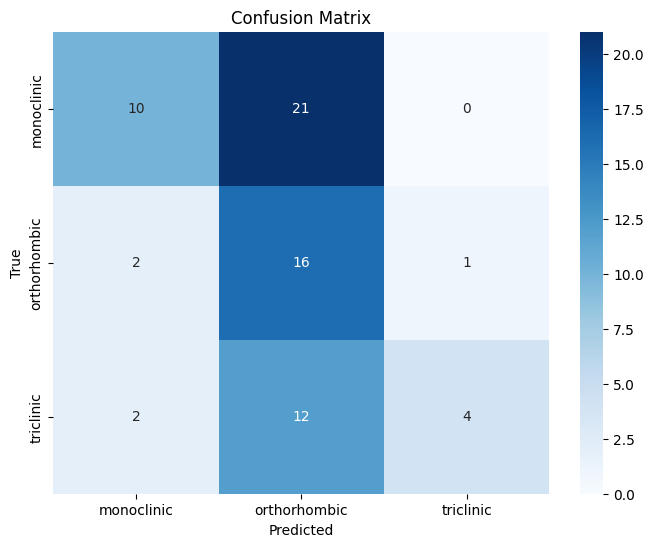

In [ ]:
from sklearn.metrics import confusion_matrix
"""
This script generates and plots a confusion matrix for a classification model's predictions.

Functions:
    confusion_matrix(y_test, y_pred): Computes the confusion matrix to evaluate the accuracy of a classification.
    sns.heatmap(data, annot, fmt, cmap, xticklabels, yticklabels): Plots the confusion matrix using a heatmap.

Variables:
    cm: The confusion matrix generated from the true labels (y_test) and predicted labels (y_pred).

Plot:
    A heatmap of the confusion matrix with labels for 'monoclinic', 'orthorhombic', and 'triclinic' on both axes.
    The plot includes axis labels ('Predicted' and 'True') and a title ('Confusion Matrix').
"""
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['monoclinic', 'orthorhombic', 'triclinic'], yticklabels=['monoclinic', 'orthorhombic', 'triclinic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
